In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
nltk.download('punkt_tab', force=True)
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/muhammadhamzaaltaf/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/muhammadhamzaaltaf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/muhammadhamzaaltaf/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/muhammadhamzaaltaf/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [129]:
# Read the data csv
df = pd.read_csv("../datasets/amazon_fine_food.csv")
df = df.head(500)
print(df.head)
columns = df.columns

<bound method NDFrame.head of       Id   ProductId          UserId                      ProfileName  \
0      1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1      2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2      3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3      4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4      5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
..   ...         ...             ...                              ...   
495  496  B000G6RYNE   APGAA43E3WPN7                           Darren   
496  497  B000G6RYNE    ABR7HU5H1KNE                            Keith   
497  498  B000G6RYNE   AJQD2WWJYOYFQ                          bubbles   
498  499  B000G6RYNE  A16YH487W9ZYO0                 Bruce G. Lindsay   
499  500  B000G6RYNE   A83YQC1XOU4CS                         J. Baker   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                    

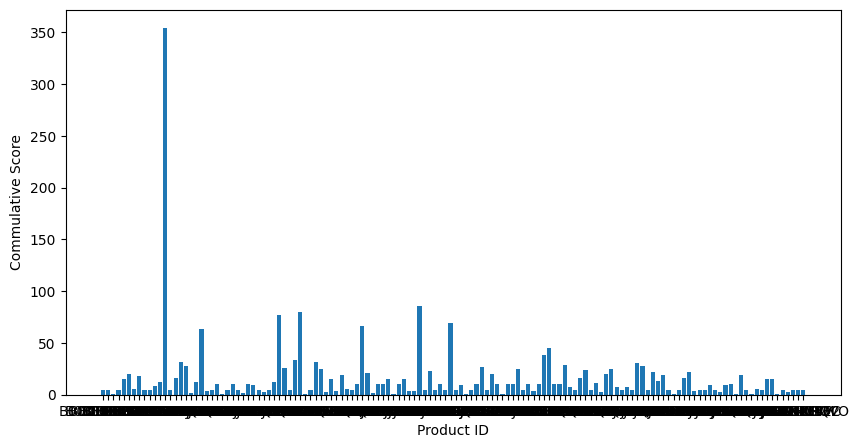

In [130]:
# compute total score for each product and check which ProductIds are getting most reviews
products_with_scores = df.groupby('ProductId')['Score'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(products_with_scores['ProductId'], products_with_scores['Score'])
plt.xlabel('Product ID')
plt.ylabel('Commulative Score')
plt.show()


In [131]:
# get top 10 products with highest scores
print(products_with_scores.head(10)['ProductId'])

0    B0001PB9FE
1    B0001PB9FY
2    B0002567IW
3    B00029XIZI
4    B00061KYVI
5    B00067AD4U
6    B0009XLVG0
7    B0009XLVGA
8    B000C21OOM
9    B000E7L2R4
Name: ProductId, dtype: object


             UserId  Total Reviews
248  A31N6KB160O508              3
110  A1Y3XPZK9ZADFW              2
303  A3HDKO7OW0QNK4              2
206  A2MUGFV2TDQ47K              2
409   AF72GTWZGAC61              2
336  A3PJZ8TU8FDQ1K              2
13   A15USNEAJUXOSH              2
33   A1B05INWIDZ74O              2


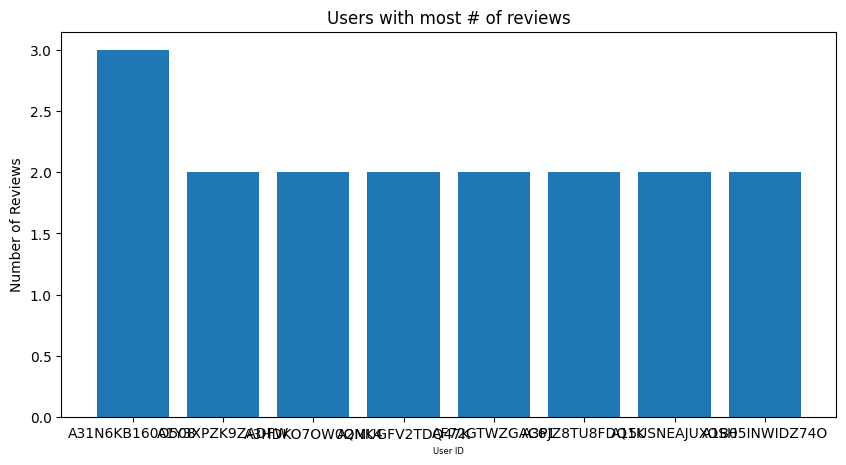

In [132]:
# get the top 5 users who has posted most reviews
users_with_number_of_reviews = df.groupby('UserId').size().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending=False).head(8)
plt.figure(figsize=(10, 5))
plt.bar(users_with_number_of_reviews['UserId'], users_with_number_of_reviews['Total Reviews'])
plt.xlabel('User ID', fontsize=6)
plt.ylabel('Number of Reviews')
plt.title('Users with most # of reviews')
plt.show()

In [133]:
# get the list of products bought by top 8 users
top_eight_user_products = df[df['UserId'].isin(users_with_number_of_reviews['UserId'])]
top_eight_user_products.groupby('UserId')['ProductId'].agg(lambda x: ','.join(x)).reset_index(name='Products').sort_values('Products', ascending=False)


,UserId,Products
3,A2MUGFV2TDQ47K,"B001GVISJM,B000G6RYNE"
7,AF72GTWZGAC61,"B001EO5ZME,B001EO5ZMY"
4,A31N6KB160O508,"B000G6RYNE,B000G6RYNE,B000G6RYNE"
0,A15USNEAJUXOSH,"B000G6RYNE,B000G6RYNE"
1,A1B05INWIDZ74O,"B000G6RYNE,B000G6RYNE"
2,A1Y3XPZK9ZADFW,"B000G6RYNE,B000G6RYNE"
6,A3PJZ8TU8FDQ1K,"B000G6RYNE,B000G6RYNE"
5,A3HDKO7OW0QNK4,"B0001PB9FE,B0001PB9FY"


In [162]:
example = df['Text'].values[0]
words_bag = nltk.word_tokenize(example)
part_of_speech = nltk.pos_tag(words_bag)
entities = nltk.chunk.ne_chunk(part_of_speech)

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


In [181]:
# VADER Sentiment Analysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
vader = SentimentIntensityAnalyzer()
results = {}
for id, row in df.iterrows():
    text = row['Text']
    id = row['Id']
    results[id] = vader.polarity_scores(text)
vader_df = pd.DataFrame(results).T
vader_df = vader_df.reset_index().rename(columns = {'index': 'Id'})
vader_df = vader_df.merge(df, how='left')
    


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/muhammadhamzaaltaf/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


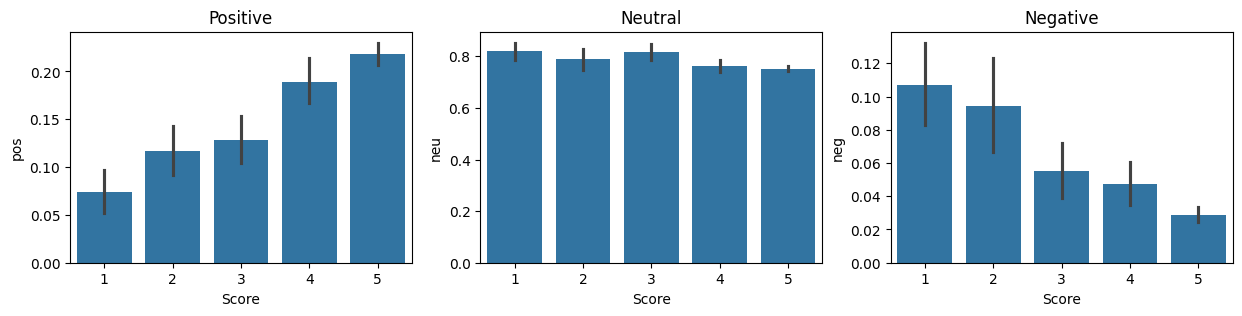

In [185]:
## check if the scores given by NLT are consistent with the score
fig, axs = plt.subplots(1, 3, figsize=(15,3))
# sns.barplot(data = vader_df, x='Score', y='compound', ax=axs[0])
sns.barplot(data = vader_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data = vader_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data = vader_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


In [189]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [190]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [199]:
roberta_results = {}
text = "I am happy to receive the parcel on time but I kinda didn't like the product itself"
for i, row in df.iterrows():
    try:
        id = row['Id']
        text = row['Text']
        encoded_text = tokenizer(text, return_tensors='pt')
        roberta_output = model(**encoded_text)
        scores = roberta_output[0][0].detach().numpy()
        scores = softmax(scores)
        print(scores)
        roberta_results[id] = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except RuntimeError:
        print("We got an error here", row['Text'])
print(roberta_results)

[0.00962423 0.04998037 0.94039536]
[0.50898594 0.4524137  0.03860039]
[0.0032289  0.09806742 0.8987037 ]
[0.00229512 0.09021915 0.90748566]
[0.00163473 0.01030247 0.98806286]
[0.0061296  0.02179588 0.97207457]
[0.00130475 0.00777379 0.99092144]
[0.00202936 0.0056852  0.9922854 ]
[0.00387358 0.09415627 0.9019702 ]
[0.00310346 0.05591217 0.9409843 ]
[0.01913409 0.07104441 0.9098215 ]
[0.37264335 0.5196989  0.10765772]
[0.46612442 0.41525936 0.11861622]
[0.00140775 0.00588328 0.9927089 ]
[0.00182442 0.02184099 0.9763346 ]
[0.00456213 0.03232541 0.9631124 ]
[0.00292259 0.01341952 0.9836579 ]
[0.00111182 0.00800626 0.9908819 ]
[0.00303008 0.14215381 0.85481614]
[0.00555464 0.03246928 0.96197605]
[0.01042219 0.06525934 0.9243185 ]
[0.00167839 0.020744   0.97757757]
[0.00947941 0.05693861 0.93358195]
[0.00326118 0.02322299 0.97351587]
[0.4495277  0.3907345  0.15973781]
[0.04531401 0.7786215  0.17606448]
[0.95331556 0.04058293 0.0061014 ]
[0.00384759 0.02275418 0.97339827]
[0.00453234 0.014126

In [204]:
roberta_df = pd.DataFrame(roberta_results).T
roberta_df = roberta_df.reset_index().rename(columns={'index': 'Id'})
roberta_df = roberta_df.merge(vader_df, how='left')
print(roberta_df)

      Id  roberta_neg  roberta_neu  roberta_pos    neg    neu    pos  \
0      1     0.009624     0.049980     0.940395  0.000  0.695  0.305   
1      2     0.508986     0.452414     0.038600  0.138  0.862  0.000   
2      3     0.003229     0.098067     0.898704  0.091  0.754  0.155   
3      4     0.002295     0.090219     0.907486  0.000  1.000  0.000   
4      5     0.001635     0.010302     0.988063  0.000  0.552  0.448   
..   ...          ...          ...          ...    ...    ...    ...   
493  496     0.001906     0.009862     0.988232  0.000  0.554  0.446   
494  497     0.004415     0.034215     0.961369  0.059  0.799  0.142   
495  498     0.006427     0.074537     0.919036  0.025  0.762  0.212   
496  499     0.865614     0.119366     0.015020  0.041  0.904  0.055   
497  500     0.002440     0.011327     0.986233  0.000  0.678  0.322   

     compound   ProductId          UserId                      ProfileName  \
0      0.9441  B001E4KFG0  A3SGXH7AUHU8GW                